In [11]:
import os
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.utils import shuffle


In [12]:
# Function to Load Images and Labels
def load_images_and_labels(directory, target_size=(32, 32)):
    images = []
    labels = []
    class_indices = {}
    for class_index, class_name in enumerate(os.listdir(directory)):
        class_dir = os.path.join(directory, class_name)
        if not os.path.isdir(class_dir):
            continue
        class_indices[class_name] = class_index
        for file in os.listdir(class_dir):
            img_path = os.path.join(class_dir, file)
            img = load_img(img_path, target_size=target_size)
            img_array = img_to_array(img) / 255.0  # Normalize
            images.append(img_array.flatten())  # Flatten to 1D vector
            labels.append(class_index)
    images = np.array(images)
    labels = np.array(labels)
    images, labels = shuffle(images, labels, random_state=42)
    return images, labels, class_indices


In [13]:
# Dataset paths
train_dir = r'C:\Users\Yashuu\Downloads\WFD(MAIN)\Classification\train'
valid_dir = r'C:\Users\Yashuu\Downloads\WFD(MAIN)\Classification\valid'
test_dir = r'C:\Users\Yashuu\Downloads\WFD(MAIN)\Classification\test'

X_train, y_train, class_indices = load_images_and_labels(train_dir, target_size=(32, 32))
X_test, y_test, _ = load_images_and_labels(test_dir, target_size=(32, 32))


In [14]:
# Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [15]:
# Optional Dimensionality Reduction (PCA to 200 features)
pca = PCA(n_components=200)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


In [16]:
# Hyperparameter Tuning with Memory Optimization (n_jobs=1, cv=2)
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf']
}
svm = SVC(probability=True)
random_search = RandomizedSearchCV(
    svm, param_distributions=param_grid, n_iter=4, cv=2,
    scoring='accuracy', verbose=1, n_jobs=1, random_state=42
)
random_search.fit(X_train_pca, y_train)



Fitting 2 folds for each of 4 candidates, totalling 8 fits


RandomizedSearchCV(cv=2, estimator=SVC(probability=True), n_iter=4, n_jobs=1,
                   param_distributions={'C': [0.1, 1, 10, 100],
                                        'kernel': ['linear', 'rbf']},
                   random_state=42, scoring='accuracy', verbose=1)

In [18]:
# Train the model.search.best_estimator_
y_pred = best_model.predict(X_test_pca)
y_prob = best_model.predict_proba(X_test_pca)[:, 1]


In [19]:
# Evaluate on Test Set
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_pca)



In [20]:
# Calculate accuracy, precision, recall, F1 score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.6526315789473685
Precision: 0.6024096385542169
Recall: 1.0
F1 Score: 0.7518796992481204


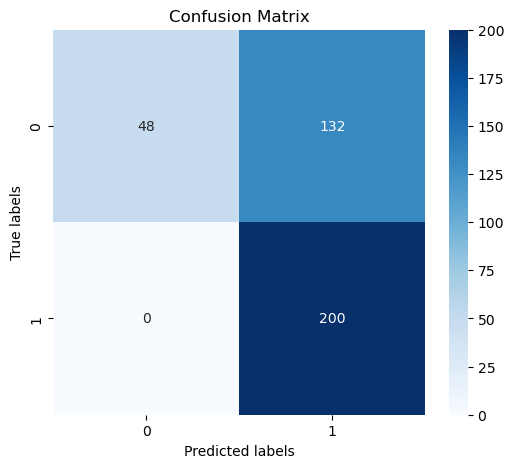

In [21]:
# Plot Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


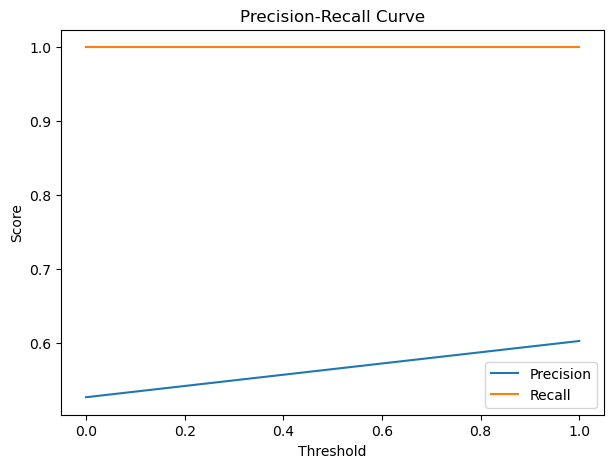

In [23]:

# Precision-Recall curve
from sklearn.metrics import precision_recall_curve
precision_vals, recall_vals, thresholds = precision_recall_curve(y_test, y_pred)

plt.figure(figsize=(7, 5))
plt.plot(thresholds, precision_vals[:-1], label='Precision')
plt.plot(thresholds, recall_vals[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()